<a href="https://colab.research.google.com/github/StellaIbeh/water_quality_model_pld3/blob/main/Water_quality_Group3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


[link text](https:// [link text](https://))**Imports for Model training and Algorithm**

---



In [ ]:
#Neccessary installations
!pip install tensorflow
!pip install keras


In [ ]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout,Input
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix, classification_report
from keras import backend as k
from keras import regularizers


# **Data handling**
In this cell, we will clean the data, fix the missing values with the best strategy, preprocess the data as deem fit, and make the data ready for vanila model implementation.

In [ ]:

# Load Dataset
# Assuming the dataset is saved as 'water_potability.csv', update accordingly
df = pd.read_csv('water_potability.csv')

# Step 1: Checking for Missing Values
"""
We first inspect the dataset for missing values in all columns.
"""
missing_values = df.isnull().sum()

# Display the columns with missing values
print("Missing values in each column:\n")
print(missing_values)

# Filling missing values as appropriate
"""
After identifying which columns have missing values, we will proceed to fill them:
- Use median values for 'ph', 'Sulfate', and 'Trihalomethanes'.
"""
# Filling missing values in 'ph', 'Sulfate', and 'Trihalomethanes' columns
if missing_values['ph'] > 0:
    df['ph'] = df['ph'].fillna(df['ph'].median())
if missing_values['Sulfate'] > 0:
    df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
if missing_values['Trihalomethanes'] > 0:
    df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

# Check again to make sure no missing values remain
print(f"\nMissing values after filling:\n {df.isnull().sum()}")

Missing values in each column:

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing values after filling:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


# **Feauture selection and standardization**

In this cell, we will select the features, standardize the trainings set and reshape the data for a CNN.

In [ ]:
# Step 5: Feature Selection and Target Variable
"""
Separate the features (X) and target variable (y).
The target variable 'Potability' indicates whether the water is potable (1) or not (0).
"""
X = df.drop('Potability', axis=1)  # Features
y = df['Potability']  # Target

# Display shapes of features and target
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

# Step 6: Standardizing the Features
"""
Standardize the feature values to have a mean of 0 and standard deviation of 1.
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Shape of scaled features (X_scaled):", X_scaled.shape)

# Step 7: Reshape the Features for CNN
"""
Reshape the scaled feature matrix to fit a 3D shape for CNN.
Since we have 9 features, we reshape to (samples, 9, 1).
"""
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
print("Shape of reshaped features (X_reshaped):", X_reshaped.shape)

Shape of features (X): (3276, 9)
Shape of target (y): (3276,)
Shape of scaled features (X_scaled): (3276, 9)
Shape of reshaped features (X_reshaped): (3276, 9, 1)


# Split the data for Training and testing
In this cell, we will split the data into training and testing sets with reasonable ratios

In [ ]:
# Step 8: Splitting the Data into Training and Testing Sets
"""
Split the dataset into 80% training and 20% testing sets.
"""
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2620, 9, 1)
Shape of X_test: (656, 9, 1)
Shape of y_train: (2620,)
Shape of y_test: (656,)


# Start the training Process- Vanila Implementation First

**We first Define the Vanilla Model Architecture**

We will use a basic CNN structure with:

*   Convolutional layers.
*   MaxPooling layers to reduce dimensionality.
*   A Dense layer at the end for classification.

In [ ]:
# Step 9: Constructing the Vanilla CNN Model using Sequential API

# Define the model
model = Sequential()

# First Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(9, 1)))  # 32 filters, kernel size 3, ReLU activation
model.add(MaxPooling1D(pool_size=2))  # Max Pooling with pool size 2

# Second Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))  # 64 filters, kernel size 3, ReLU activation

# Flatten the data to pass it to the Dense layer
model.add(Flatten())

# Fully Connected (Dense) Layer
model.add(Dense(64, activation='relu'))  # Dense layer with 64 units and ReLU activation

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit for binary classification (0 or 1)

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 7, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,561 (41.25 KB)

 Trainable params: 10,561 (41.25 KB)

 Non-trainable params: 0 (0.00 B)

**Next, we compile the model.**

Since this is a classification problem, we will use:

*   Binary Crossentropy as the loss function (since we have binary outcomes: 0 and 1).
*   Accuracy as the metric to track.


In [ ]:
# Step 10: Compiling the Model
model.compile(loss='binary_crossentropy',  # Binary Crossentropy loss function
              metrics=['accuracy'])  # Accuracy metric to track performance


We will train the model using the training dataset. For simplicity, we’ll train for 20 epochs with a batch size of 32.

In [ ]:
# Step 11: Training the Model

# Train the model with 20 epochs and a batch size of 32
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

#Save the model
model.save('vanilla_model.h5')



Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6050 - loss: 0.6780 - val_accuracy: 0.6341 - val_loss: 0.6522
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6202 - loss: 0.6611 - val_accuracy: 0.6402 - val_loss: 0.6396
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6390 - loss: 0.6445 - val_accuracy: 0.6570 - val_loss: 0.6347
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6507 - loss: 0.6341 - val_accuracy: 0.6509 - val_loss: 0.6238
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6638 - loss: 0.6192 - val_accuracy: 0.6509 - val_loss: 0.6214
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6727 - loss: 0.6102 - val_accuracy: 0.6646 - val_loss: 0.6199
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6889 - loss: 0.5908 - val_accuracy: 0.6707 - val_loss: 0.6156
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6819 - loss: 0.5897 - val_accuracy: 0.6555 - val_loss:

Finally, we evaluate the model on the test dataset to check how well it generalizes to unseen data and perform error analysis using a confusion matrix and classification report.


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6431 - loss: 0.6361 
Test Accuracy: 64.33%
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[288 124]
 [110 134]]


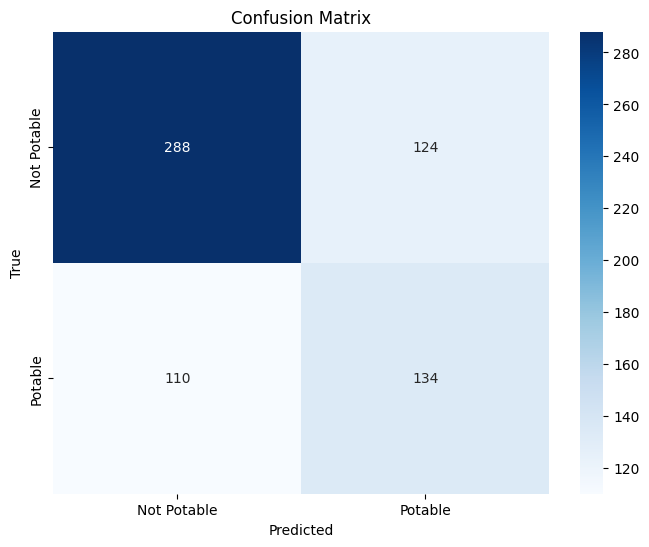

Classification Report:
              precision    recall  f1-score   support

 Not Potable       0.72      0.70      0.71       412
     Potable       0.52      0.55      0.53       244

    accuracy                           0.64       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.65      0.64      0.65       656



In [ ]:
# Step 12: Evaluating the Model

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 14: Error Analysis (Confusion Matrix & Classification Report)

# Predicting the test set
y_pred = model.predict(X_test)

# Convert predictions to binary classes (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)  # Using threshold 0.5 and reshaping to 1D

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Not Potable', 'Potable']))

# Model Optimization - L1 Regularization




In [ ]:
# Define the model with L1 Regularization and Dropout
def create_l1_regularized_model(l1_lambda=0.01, dropout_rate=0.2):
    model = Sequential()

    # First Convolutional Layer with L1 regularization and Dropout
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(9, 1),
                     kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))

    # Second Convolutional Layer with L1 regularization and Dropout
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                     kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda)))
    model.add(Dropout(dropout_rate))

    # Flatten the data
    model.add(Flatten())

    # Fully Connected Layer with L1 regularization and Dropout
    model.add(Dense(64, activation='relu',
                    kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda)))
    model.add(Dropout(dropout_rate))

    # Output Layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model using Adam optimizer
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create and compile the L1 regularized model with Dropout
l1_model = create_l1_regularized_model()

# Early stopping callbacks
early_stopping_val_loss = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
early_stopping_val_accuracy = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model with Early Stopping callbacks
history = l1_model.fit(X_train, y_train, epochs=100, batch_size=32,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping_val_loss, early_stopping_val_accuracy])

# Save the model
l1_model.save('L1_model.h5')

# Evaluate the model
test_loss, test_accuracy = l1_model.evaluate(X_test, y_test)
print(f"L1 Regularized Model with Dropout - Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5498 - loss: 7.8681 - val_accuracy: 0.6280 - val_loss: 3.3825
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6023 - loss: 2.5250 - val_accuracy: 0.6280 - val_loss: 0.9941
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6119 - loss: 0.8505 - val_accuracy: 0.6280 - val_loss: 0.6858
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5945 - loss: 0.6946 - val_accuracy: 0.6280 - val_loss: 0.6816
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6101 - loss: 0.6874 - val_accuracy: 0.6280 - val_loss: 0.6808
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6224 - loss: 0.6822 - val_accuracy: 0.6280 - val_loss: 0.6800
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5995 - loss: 0.6894 - val_accuracy: 0.6280 - val_loss: 0.6792
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6060 - loss: 0.6871 - val_accuracy: 0.6280 - v

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6400 - loss: 3.3809 
L1 Regularized Model with Dropout - Test Accuracy: 62.80%


Error Analysis(Confusion Matrix and Classification Report)



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[412   0]
 [244   0]]


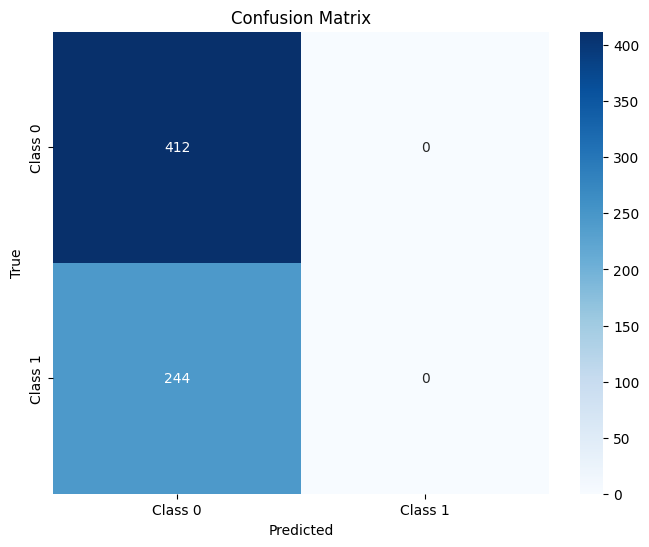

Classification Report:
              precision    recall  f1-score   support

 Not Potable       0.63      1.00      0.77       412
     Potable       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Error Analysis (Confusion Matrix & Classification Report)

# Predicting the test set
y_pred = l1_model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)  # Convert predictions to 0 or 1

# Compute and Print Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Not Potable', 'Potable']))

# Model Optimization - L2 Regularization


In [ ]:

# Define the model with L2 regularization and Dropout
def create_l2_regularized_model(l2_lambda=0.01, dropout_rate=0.5):
    model = Sequential()

    # First Convolutional Layer with L2 regularization and Dropout
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(9, 1),
                     kernel_regularizer=l2(l2_lambda), bias_regularizer=l2(l2_lambda)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))

    # Second Convolutional Layer with L2 regularization and Dropout
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                     kernel_regularizer=l2(l2_lambda), bias_regularizer=l2(l2_lambda)))
    model.add(Dropout(dropout_rate))

    # Flatten the data
    model.add(Flatten())

    # Fully Connected Layer with L2 regularization and Dropout
    model.add(Dense(64, activation='relu',
                    kernel_regularizer=l2(l2_lambda), bias_regularizer=l2(l2_lambda)))
    model.add(Dropout(dropout_rate))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = RMSprop(learning_rate=0.001, rho=0.9)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and compile the L2 regularized model with Dropout
l2_model = create_l2_regularized_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = l2_model.fit(X_train, y_train, epochs=40, batch_size=32,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping])

l2_model.save('L2_model.h5')

# Evaluate the model
test_loss, test_accuracy = l2_model.evaluate(X_test, y_test)
print(f"L2 Regularized Model with Dropout - Test Accuracy: {test_accuracy * 100:.2f}%")



Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5413 - loss: 1.5549 - val_accuracy: 0.6280 - val_loss: 1.1119
Epoch 2/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5921 - loss: 1.0366 - val_accuracy: 0.6280 - val_loss: 0.8199
Epoch 3/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6050 - loss: 0.7945 - val_accuracy: 0.6280 - val_loss: 0.7070
Epoch 4/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6045 - loss: 0.7052 - val_accuracy: 0.6280 - val_loss: 0.6722
Epoch 5/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6233 - loss: 0.6724 - val_accuracy: 0.6280 - val_loss: 0.6648
Epoch 6/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5983 - loss: 0.6745 - val_accuracy: 0.6280 - val_loss: 0.6624
Epoch 7/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6243 - loss: 0.6643 - val_accuracy: 0.6280 - val_loss: 0.6635
Epoch 8/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6048 - loss: 0.6722 - val_accuracy: 0.6280 - val_loss: 0.6629
Epo

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6400 - loss: 0.6562 
L2 Regularized Model with Dropout - Test Accuracy: 62.80%


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


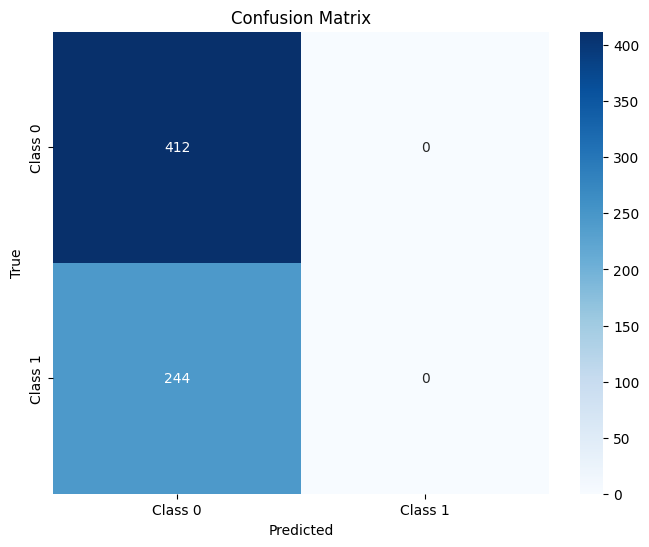

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Predict labels for the test set
y_pred = l2_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary values (0 or 1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))